<a href="https://colab.research.google.com/github/PratibhaSanganmath/Demand-prediction-for-public-transport-/blob/main/Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

##Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Nairobi Transport Data.zip')

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,FIYGXWKCRM,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000



There are total 61 unique seats in this dataset.

travelers have used 2 types of payment method and most of the people have used Mpesa to pay for their ticket.

The record of 149 unique days are present in this dataset out of 2 years.

There are 2 different types of car used and most of them are bus.

In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df.shape

(51645, 10)

In [ ]:
# duplicate
len(df[df.duplicated()])

0

In [ ]:
df['ride_id'].unique

<bound method Series.unique of 0         1442
1         5437
2         5710
3         5777
4         5778
         ...  
51640    13826
51641    13809
51642    13809
51643    13796
51644    14304
Name: ride_id, Length: 51645, dtype: int64>

In [ ]:
seats_sold_on_each_ride=pd.DataFrame(df['ride_id'].value_counts())
seats_sold_on_each_ride

,ride_id
8454,50
8090,49
10834,49
11382,49
13211,49
...,...
5804,1
9834,1
9738,1
11755,1


In [ ]:
ride_id_dict = dict() 
for ride_id in df['ride_id']:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [ ]:
ride_id_dict

{1442: 1,
 5437: 1,
 5710: 1,
 5777: 5,
 5778: 31,
 5781: 26,
 5784: 1,
 5789: 1,
 5790: 2,
 5791: 1,
 5792: 1,
 5793: 1,
 5794: 2,
 5795: 1,
 5796: 2,
 5797: 3,
 5798: 1,
 5800: 2,
 5801: 11,
 5802: 3,
 5803: 11,
 5804: 1,
 5808: 2,
 5809: 1,
 5810: 1,
 5811: 1,
 5812: 1,
 5816: 1,
 5817: 1,
 5822: 1,
 5823: 2,
 5824: 1,
 5825: 1,
 5826: 1,
 5830: 1,
 5834: 1,
 5835: 2,
 5836: 1,
 5837: 1,
 5838: 1,
 5839: 1,
 5840: 1,
 5844: 1,
 5845: 1,
 5849: 1,
 5850: 1,
 5851: 1,
 5852: 1,
 5853: 1,
 5856: 11,
 5857: 4,
 5858: 11,
 5861: 1,
 5862: 1,
 5863: 1,
 5864: 1,
 5867: 9,
 5868: 6,
 5873: 1,
 5874: 5,
 5875: 3,
 5876: 1,
 5878: 2,
 5880: 11,
 5881: 1,
 5882: 4,
 5886: 1,
 5887: 1,
 5888: 1,
 5889: 1,
 5890: 1,
 5894: 11,
 5897: 11,
 5898: 1,
 5899: 1,
 5901: 11,
 5902: 5,
 5910: 11,
 5918: 1,
 5919: 1,
 5920: 1,
 5921: 1,
 5922: 1,
 5923: 1,
 5924: 1,
 5925: 1,
 5928: 1,
 5929: 8,
 5931: 1,
 5933: 1,
 5940: 1,
 5941: 3,
 5942: 1,
 5943: 1,
 5944: 1,
 5945: 1,
 5946: 1,
 5947: 11,
 5950: 1

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop= True, inplace=True)

In [ ]:
df['number_of_ticket_sold']= np.zeros(len(df))

In [ ]:
for i in range(len(df)):
    ride_id = df.loc[i]["ride_id"]
    df.at[i,'number_of_ticket_sold'] = ride_id_dict[ride_id]

In [ ]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket_sold
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,1.0
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49,29.0
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49,29.0
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49,27.0


In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket_sold
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


In [ ]:
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket_sold
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,1.0
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49,29.0
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49,29.0
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49,27.0
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49,1.0


Text(0.5, 1.0, 'Show the number of seat during the period')

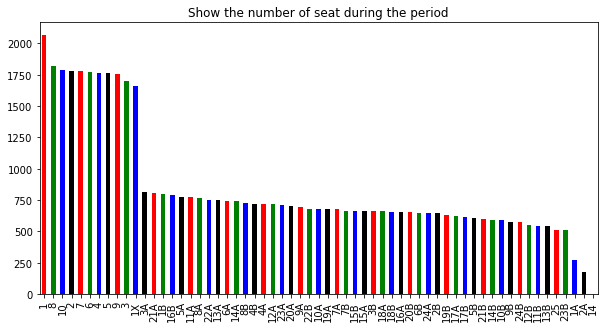

In [ ]:
plt.subplots(figsize=(10,5))
df.seat_number.value_counts().plot(kind='bar',color= ['r','g','b','k'])
plt.title('Show the number of seat during the period')

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['ride_id', 'max_capacity', 'number_of_ticket_sold'], dtype='object')

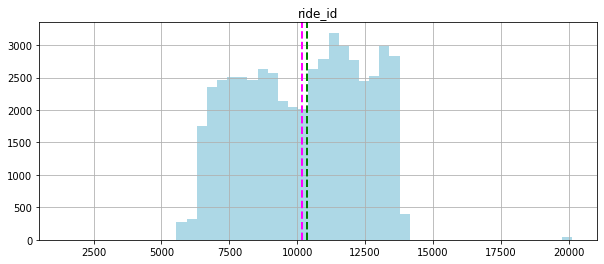

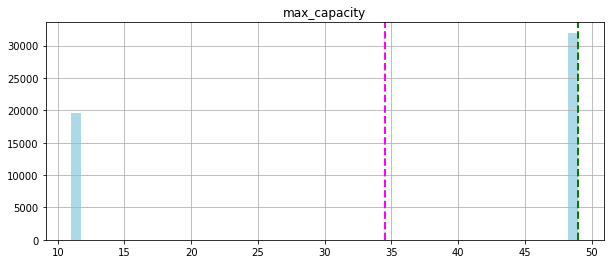

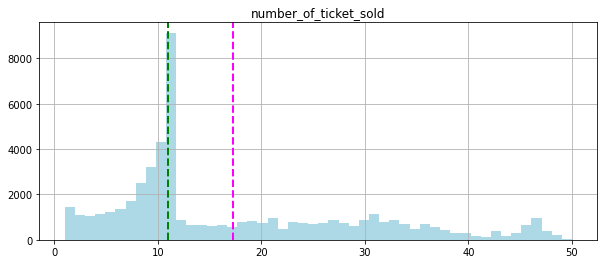

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(10, 4))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax,color='lightblue')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
categorical_features = df.describe(include=['object','category']).columns

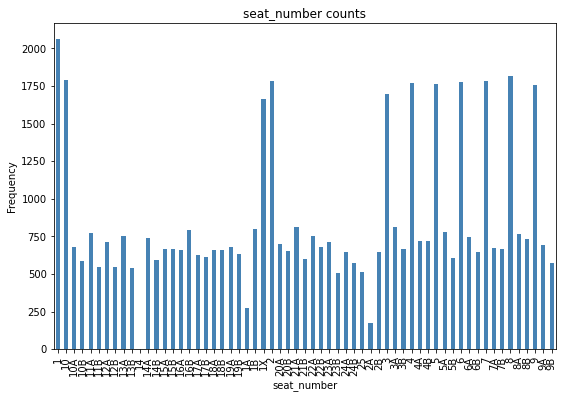

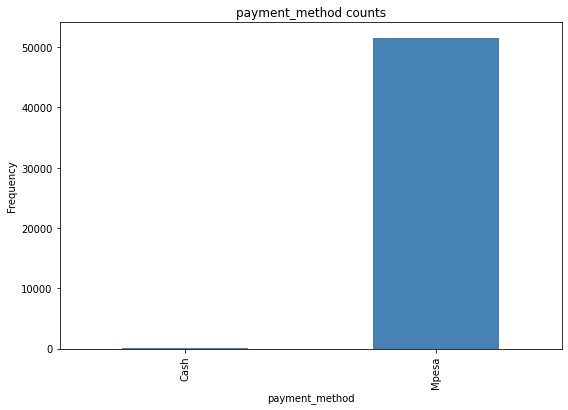

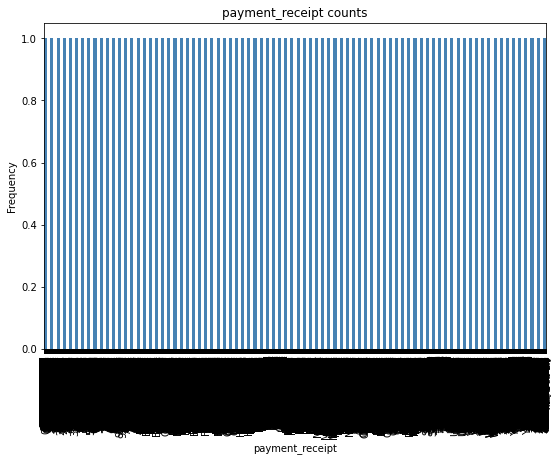

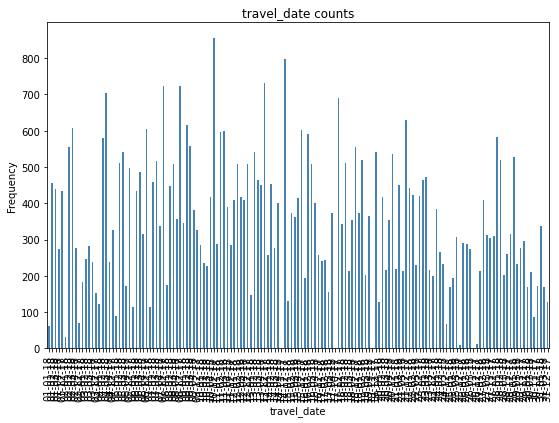

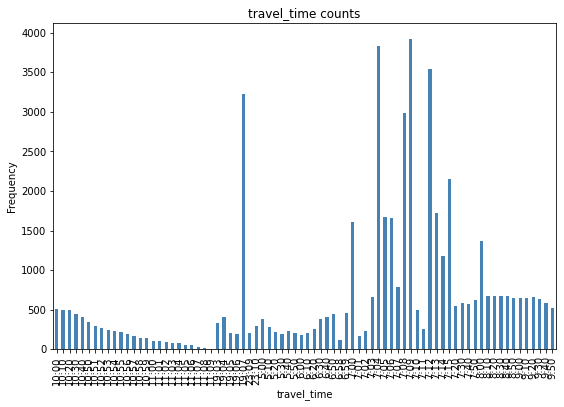

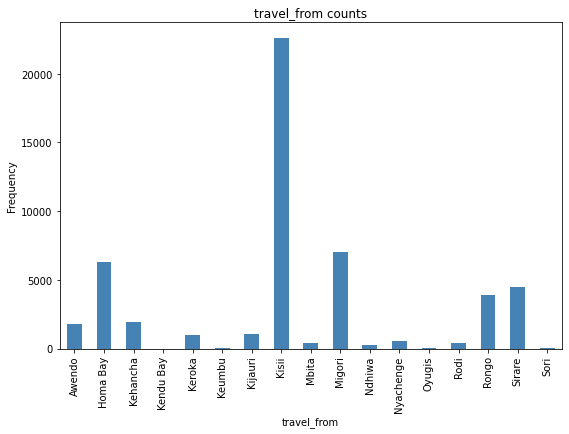

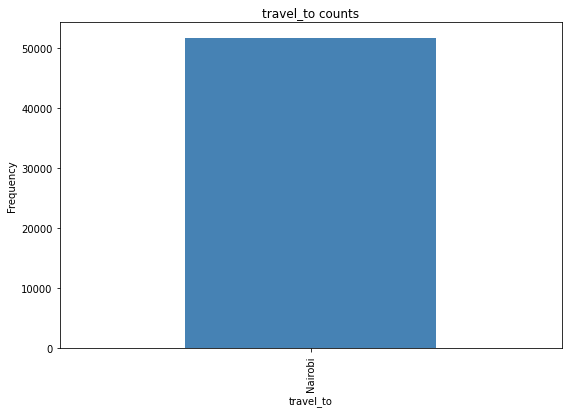

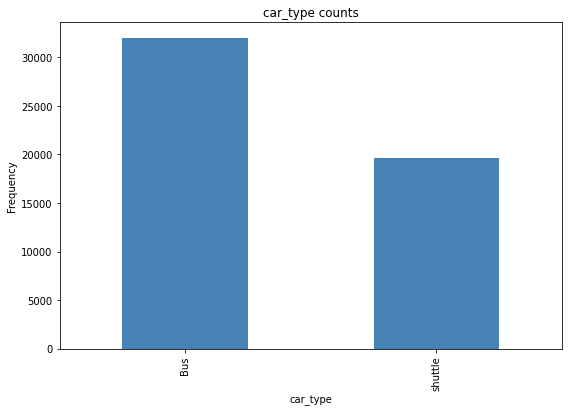

In [ ]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
df['car_type'].unique()

array(['Bus', 'shuttle'], dtype=object)

Text(0.5, 1.0, 'date of travel')

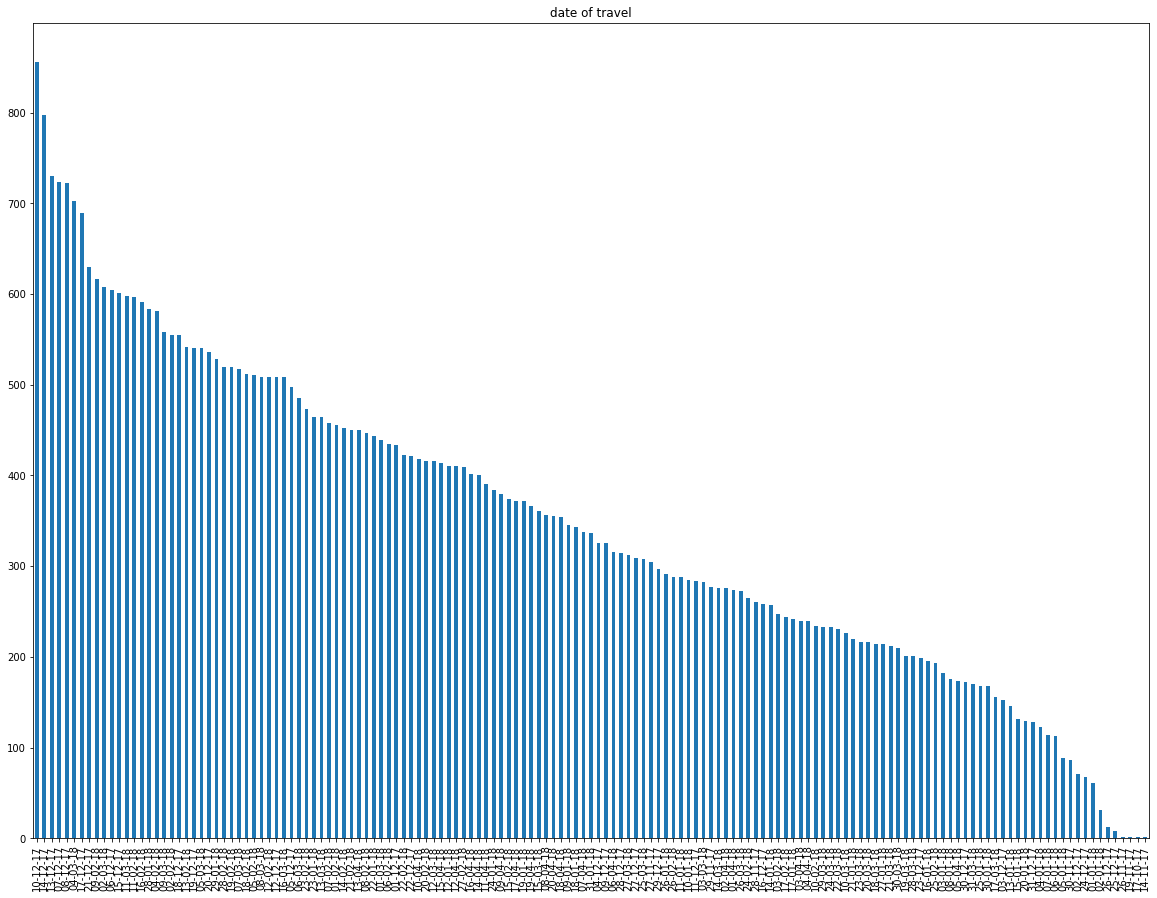

In [ ]:
plt.subplots(figsize=(20,15))
df.travel_date.value_counts().plot(kind='bar',color=['yellow','pink','blue','brown'])
plt.title('date of travel')

Text(0.5, 1.0, 'travelling from')

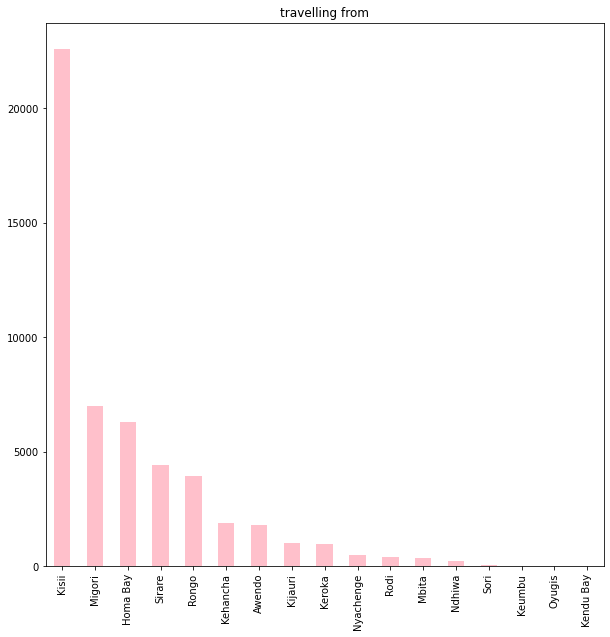

In [ ]:
plt.subplots(figsize=(10,10))
df.travel_from.value_counts().plot(kind='bar',color='pink')
plt.title('travelling from')

In [ ]:
df['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

In [ ]:
df.travel_from.value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

Text(0.5, 1.0, 'car_type')

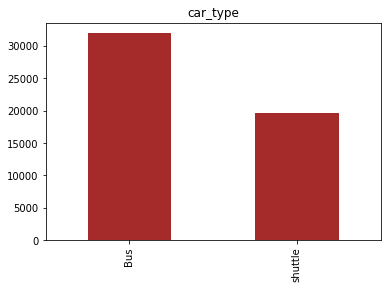

In [ ]:
df.car_type.value_counts().plot(kind='bar',color='brown')
plt.title('car_type')

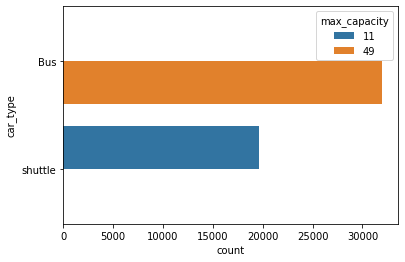

In [ ]:
sns.countplot(y=df['car_type'], hue=df['max_capacity'])

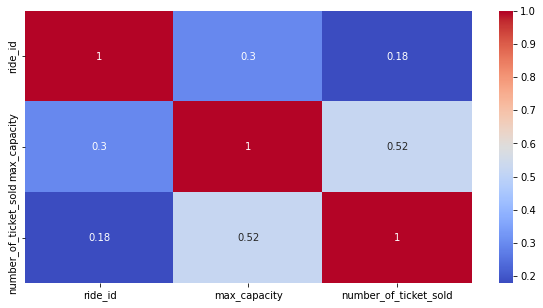

In [ ]:
 # Correlation
plt.figure(figsize=(10,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket_sold
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN,NaN
top,NaN,1,Mpesa,FIYGXWKCRM,10-12-17,7:09,Kisii,Nairobi,Bus,NaN,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321,17.280918
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193,12.375598
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,1.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,9.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,11.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,26.000000


In [ ]:
seats_sold_on_each_ride=pd.DataFrame(df['ride_id'].value_counts())
seats_sold_on_each_ride


,ride_id
8454,50
8090,49
10834,49
11382,49
13211,49
...,...
5804,1
9834,1
9738,1
11755,1


In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['ride_id','seat_number']]])

,variables,VIF
0,max_capacity,3.863851
1,number_of_ticket_sold,3.863851


In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'number_of_ticket_sold'],
      dtype='object')

In [ ]:
dependent_variable = 'number_of_ticket_sold'
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['travel_from',
 'max_capacity',
 'payment_method',
 'travel_time',
 'travel_to',
 'seat_number',
 'travel_date',
 'payment_receipt',
 'ride_id',
 'car_type']

In [ ]:
df[independent_variables]

,travel_from,max_capacity,payment_method,travel_time,travel_to,seat_number,travel_date,payment_receipt,ride_id,car_type
0,Migori,49,Mpesa,7:15,Nairobi,15A,17-10-17,UZUEHCBUSO,1442,Bus
1,Migori,49,Mpesa,7:12,Nairobi,14A,19-11-17,TIHLBUSGTE,5437,Bus
2,Keroka,49,Mpesa,7:05,Nairobi,8B,26-11-17,EQX8Q5G19O,5710,Bus
3,Homa Bay,49,Mpesa,7:10,Nairobi,19A,27-11-17,SGP18CL0ME,5777,Bus
4,Migori,49,Mpesa,7:12,Nairobi,11A,27-11-17,BM97HFRGL9,5778,Bus
...,...,...,...,...,...,...,...,...,...,...
51640,Awendo,49,Mpesa,8:00,Nairobi,9B,20-04-18,8V2XDDZR6V,13826,Bus
51641,Migori,49,Mpesa,8:00,Nairobi,18A,20-04-18,4PEBSVJSNK,13809,Bus
51642,Migori,49,Mpesa,8:00,Nairobi,17A,20-04-18,LVN64LZDNN,13809,Bus
51643,Awendo,49,Mpesa,7:08,Nairobi,16B,20-04-18,REYBSKTYWN,13796,Bus
